## Predict Pneumonia Status From X-Ray

### The purpose is to develop artificial intelligence (AI) tools for radiology to detect pneumonia in patient.
### The data is sourced from the Radiological Society of North America (RSNA)
### The data source is 3.96 GB in size so I am only going to reference it and not upload it.
### Data Source: https://www.kaggle.com/c/rsna-pneumonia-detection-challenge/data

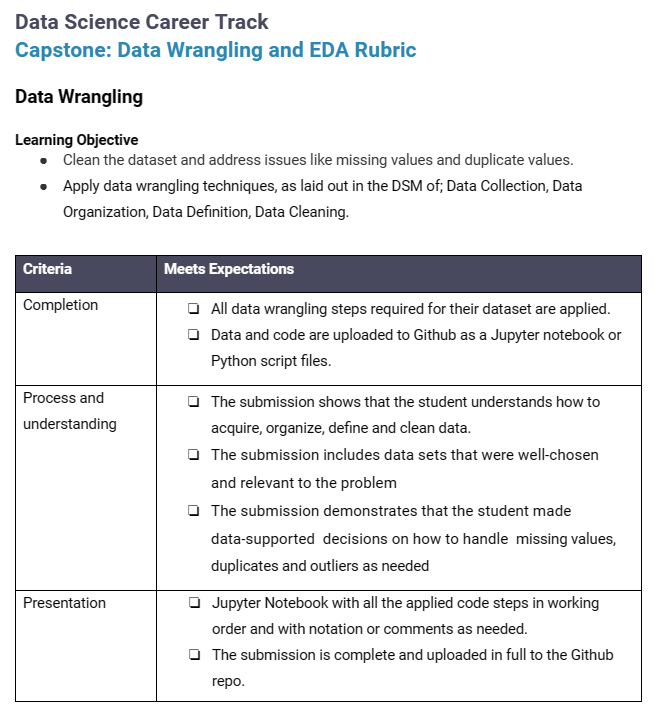

In [ ]:
# !pip install pydicom

In [1]:
# Import necessary libraries
import os
import hashlib
import matplotlib.pyplot as plt
import pydicom
import time
from collections import defaultdict

In [2]:
# Count number of images in the test and train directories

def count_files(directory):
    """Count the number of files in the specified directory."""
    return sum(os.path.isfile(os.path.join(directory, f)) for f in os.listdir(directory))

# Directory path 
directory_path = 'Data/test_images'
num_test_images = count_files(directory_path)
print(f"There are {num_test_images} images in the {directory_path} directory.")


There are 3000 images in the Data/test_images directory.


In [3]:
# Count number of images in the test and train directories

def count_files(directory):
    """Count the number of files in the specified directory."""
    return sum(os.path.isfile(os.path.join(directory, f)) for f in os.listdir(directory))

# Directory path 
directory_path = 'Data/train_images'
num_train_images = count_files(directory_path)
print(f"There are {num_train_images} images in the {directory_path} directory.")


There are 26684 images in the Data/train_images directory.


In [4]:
# Create a hash of the image using SHA256

def calculate_dicom_hash(filepath):
    """Calculate the hash of a DICOM file based on its pixel data."""
    try:
        ds = pydicom.dcmread(filepath)
        pixel_data = ds.pixel_array.tobytes()  # Convert pixel data to bytes
        hash_obj = hashlib.sha256(pixel_data)
        return hash_obj.hexdigest()
    except Exception as e:
        print(f"Error reading DICOM file {filepath}: {e}")
        return None

In [5]:
# Return image names with matching hashes

def find_duplicate_dicoms(directory):
    """Find and return duplicates DICOM files based on pixel data."""
    hashes = defaultdict(list)
    for filename in os.listdir(directory):
        if not filename.lower().endswith('.dcm'):
            continue  # Skip non-DICOM files
        filepath = os.path.join(directory, filename)
        file_hash = calculate_dicom_hash(filepath)
        if file_hash:  
            hashes[file_hash].append(filepath)
    
    # Filter out unique files
    return {hash: paths for hash, paths in hashes.items() if len(paths) > 1}

In [6]:
start = time.time()

directory_path = 'Data/test_images'  
duplicates = find_duplicate_dicoms(directory_path)

# Print out the duplicates
for hash_value, files in duplicates.items():
    print(f"Duplicate files for hash {hash_value}:")
    for file in files:
        print(file)

print(f"Elapsed Run Time in Seconds: {time.time() - start:.2f}")

Elapsed Run Time in Seconds: 19.70


In [7]:
start = time.time()

directory_path = 'Data/train_images'  
duplicates = find_duplicate_dicoms(directory_path)

# Print out the duplicates
for hash_value, files in duplicates.items():
    print(f"Duplicate files for hash {hash_value}:")
    for file in files:
        print(file)

print(f"Elapsed Run Time in Seconds: {time.time() - start:.2f}")

Duplicate files for hash b21ec705d852a0b418b28349a4f53d43a2ea25d857dcef5b560be5750bcfd337:
Data/train_images\08d88a60-146c-49a7-9450-45293024cf46.dcm
Data/train_images\8f96ca8e-ff76-41bc-bf03-da5b031cabee.dcm
Elapsed Run Time in Seconds: 173.36


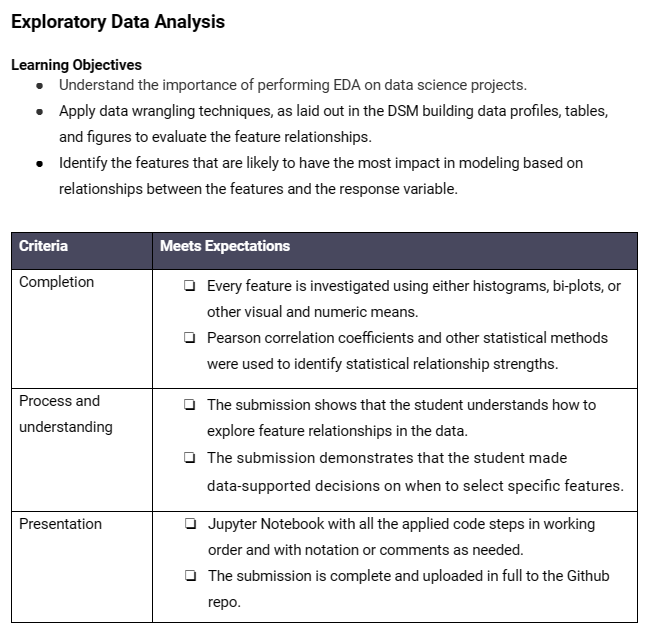

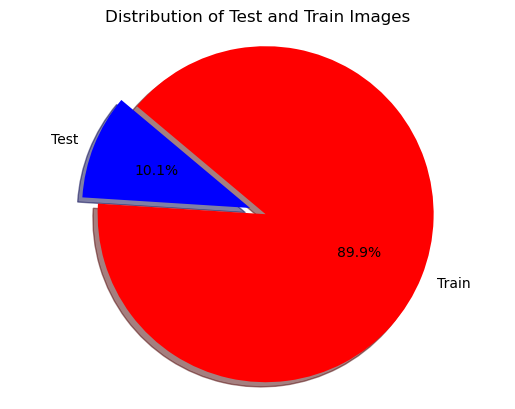

In [8]:
# Create a pie chart
labels = ['Test', 'Train']
sizes = [num_test_images, num_train_images]
colors = ['blue', 'red'] 
explode = (0.1, 0) 

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal') 

# Add a title
plt.title('Distribution of Test and Train Images')

# Show the pie chart
plt.show()
